In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

In [2]:
# Create a regression dataset
cirle_dataset = datasets.make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)
X, y = cirle_dataset

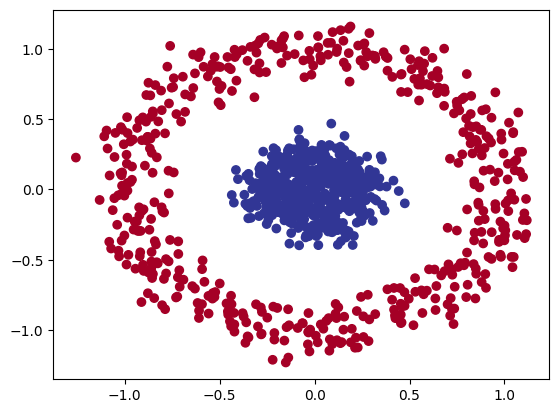

In [3]:
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [4]:
# split dataset into train and test
from sklearn import model_selection
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.2536, -0.0262],
         [ 0.5307, -0.7280],
         [-1.0552, -0.0629],
         [-0.9480, -0.2288],
         [-0.0323,  0.2542]]),
 tensor([1., 0., 0., 0., 1.]))

Training loop

In [5]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = y_train.reshape(-1, 1).shape[1]

In [6]:
X_train = X_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_train = y_train.to(DEVICE)
y_test = y_test.to(DEVICE)

In [7]:
from networks import SimpleNet, DeepNet, DeepNetV2
from trainer import fit, predict, evaluate

In [8]:
EPOCHS = 500
BCE_LOSS = torch.nn.BCEWithLogitsLoss()
LR = 0.1

In [9]:
simple_net = SimpleNet(INPUT_SIZE, OUTPUT_SIZE).to(DEVICE)
SGD = torch.optim.SGD(params=simple_net.parameters(), 
                            lr=0.01)

simple_history = fit(EPOCHS, simple_net, BCE_LOSS, SGD, X_train, y_train, X_test, y_test)
        

Epoch: 1 -> Loss: 0.69549 , Test Test:  0.693713 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 21 -> Loss: 0.69416 , Test Test:  0.693029 | Acc: 57.12%, Test Acc: 56.00%
Epoch: 41 -> Loss: 0.69364 , Test Test:  0.693002 | Acc: 64.25%, Test Acc: 64.00%
Epoch: 61 -> Loss: 0.69339 , Test Test:  0.693173 | Acc: 67.88%, Test Acc: 67.50%
Epoch: 81 -> Loss: 0.69325 , Test Test:  0.693394 | Acc: 68.88%, Test Acc: 65.00%
Epoch: 101 -> Loss: 0.69315 , Test Test:  0.693620 | Acc: 63.62%, Test Acc: 61.00%
Epoch: 121 -> Loss: 0.69309 , Test Test:  0.693835 | Acc: 60.00%, Test Acc: 56.00%
Epoch: 141 -> Loss: 0.69303 , Test Test:  0.694036 | Acc: 55.50%, Test Acc: 52.50%
Epoch: 161 -> Loss: 0.69299 , Test Test:  0.694221 | Acc: 53.37%, Test Acc: 49.50%
Epoch: 181 -> Loss: 0.69296 , Test Test:  0.694391 | Acc: 52.25%, Test Acc: 49.00%
Epoch: 201 -> Loss: 0.69293 , Test Test:  0.694546 | Acc: 53.00%, Test Acc: 48.50%
Epoch: 221 -> Loss: 0.69291 , Test Test:  0.694688 | Acc: 52.38%, Test Acc: 47.50%
Epoch: 241

In [10]:
deep_net = DeepNet(INPUT_SIZE, OUTPUT_SIZE).to(DEVICE)
SGD = torch.optim.SGD(params=deep_net.parameters(), 
                            lr=0.01)
deep_history = fit(EPOCHS, deep_net, BCE_LOSS, SGD, X_train, y_train, X_test, y_test)

Epoch: 1 -> Loss: 0.69849 , Test Test:  0.698445 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 21 -> Loss: 0.69374 , Test Test:  0.694013 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 41 -> Loss: 0.68949 , Test Test:  0.690086 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 61 -> Loss: 0.68533 , Test Test:  0.686297 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 81 -> Loss: 0.68149 , Test Test:  0.682846 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 101 -> Loss: 0.67802 , Test Test:  0.679789 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 121 -> Loss: 0.67463 , Test Test:  0.676736 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 141 -> Loss: 0.67116 , Test Test:  0.673622 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 161 -> Loss: 0.66773 , Test Test:  0.670523 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 181 -> Loss: 0.66417 , Test Test:  0.667317 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 201 -> Loss: 0.66039 , Test Test:  0.663897 | Acc: 62.25%, Test Acc: 60.00%
Epoch: 221 -> Loss: 0.65636 , Test Test:  0.660250 | Acc: 79.75%, Test Acc: 74.50%
Epoch: 241

In [11]:
deep_model_v2 = DeepNetV2(INPUT_SIZE, OUTPUT_SIZE).to(DEVICE)
SGD = torch.optim.SGD(params=deep_model_v2.parameters(), 
                            lr=0.1)
deepv2_history = fit(EPOCHS, deep_model_v2, BCE_LOSS, SGD, X_train, y_train, X_test, y_test)

Epoch: 1 -> Loss: 0.69247 , Test Test:  0.688963 | Acc: 53.50%, Test Acc: 68.50%
Epoch: 21 -> Loss: 0.68425 , Test Test:  0.683693 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 41 -> Loss: 0.67564 , Test Test:  0.676973 | Acc: 50.25%, Test Acc: 50.00%
Epoch: 61 -> Loss: 0.66255 , Test Test:  0.665632 | Acc: 58.13%, Test Acc: 52.50%
Epoch: 81 -> Loss: 0.63796 , Test Test:  0.643034 | Acc: 70.75%, Test Acc: 64.50%
Epoch: 101 -> Loss: 0.58254 , Test Test:  0.590172 | Acc: 91.38%, Test Acc: 89.00%
Epoch: 121 -> Loss: 0.45798 , Test Test:  0.468805 | Acc: 99.88%, Test Acc: 99.50%
Epoch: 141 -> Loss: 0.27150 , Test Test:  0.285901 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 161 -> Loss: 0.13635 , Test Test:  0.151745 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 181 -> Loss: 0.07466 , Test Test:  0.088040 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 201 -> Loss: 0.04685 , Test Test:  0.057964 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 221 -> Loss: 0.03260 , Test Test:  0.041939 | Acc: 100.00%, Test Acc: 100.00%


In [12]:
# Visualize the loss and accuracy
# plot 
def plot_loss_acc(history:dict, title:str):
    history_df = pd.DataFrame(history)
    train_loss_simp = history_df["train_loss"]
    train_acc_simp = history_df["train_accuracy"]
    test_loss_simp = history_df["test_loss"]
    test_acc_simp = history_df["test_accuracy"]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_simp, label="train loss")
    plt.plot(test_loss_simp, label="test loss")
    plt.legend()
    plt.title(f"{title} Loss")
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_simp, label="train accuracy")
    plt.plot(test_acc_simp, label="test accuracy")
    plt.legend()
    plt.title(f"{title} Accuracy")
    plt.show()
    
# def plot_loss_acc_merge(history, **histories):
#     history_df = pd.DataFrame(history)
#     train_loss_simp = history_df["train_loss"]
#     train_acc_simp = history_df["train_accuracy"]
#     test_loss_simp = history_df["test_loss"]
#     test_acc_simp = history_df["test_accuracy"]
#    


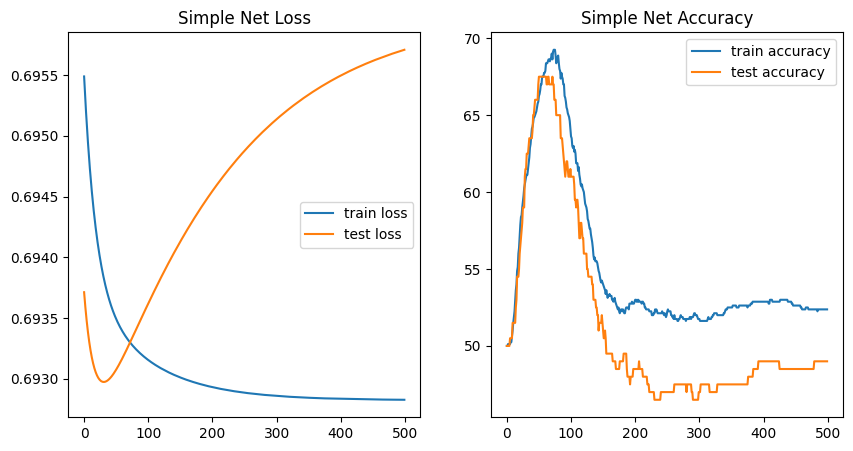

In [13]:
plot_loss_acc(simple_history, "Simple Net")

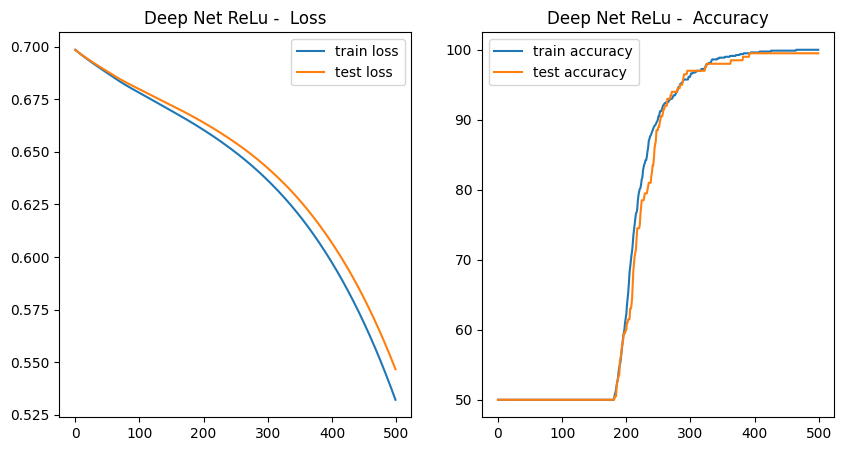

In [14]:
plot_loss_acc(deep_history, "Deep Net ReLu - ")

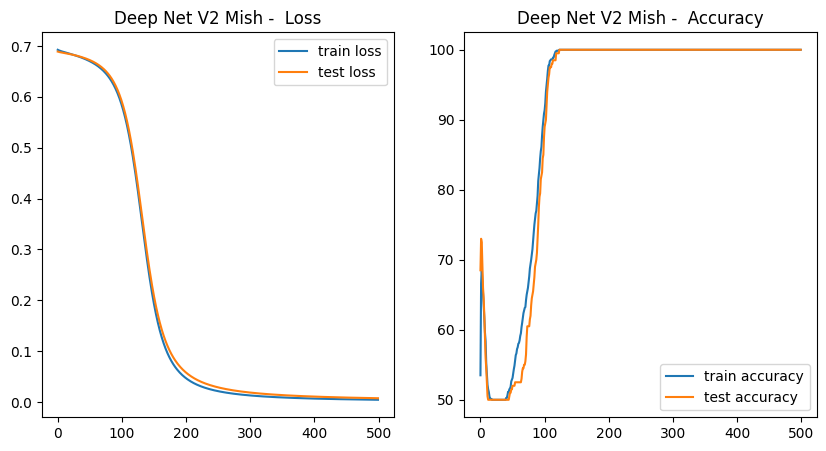

In [15]:
plot_loss_acc(deepv2_history, "Deep Net V2 Mish - ")

In [16]:
class DeepNetV3(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepNetV3, self).__init__()
        self.l1 = nn.Linear(input_size, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, output_size)
        self.mish = nn.Mish()
        
    def forward(self, x):
        z = self.mish(self.l1(x))
        z = self.mish(self.l2(z))
        z = self.mish(self.l3(z))
        out = self.l4(z)
        
        return out

In [17]:
deep_model_v3 = DeepNetV3(INPUT_SIZE, OUTPUT_SIZE).to(DEVICE)
SGD = torch.optim.SGD(params=deep_model_v3.parameters(), 
                            lr=0.2)
deepv3_history = fit(EPOCHS, deep_model_v3, BCE_LOSS, SGD, X_train, y_train, X_test, y_test)

Epoch: 1 -> Loss: 0.69362 , Test Test:  0.692415 | Acc: 41.38%, Test Acc: 44.00%
Epoch: 21 -> Loss: 0.68802 , Test Test:  0.687853 | Acc: 50.00%, Test Acc: 50.00%
Epoch: 41 -> Loss: 0.67937 , Test Test:  0.680336 | Acc: 84.00%, Test Acc: 83.50%
Epoch: 61 -> Loss: 0.65826 , Test Test:  0.661320 | Acc: 97.62%, Test Acc: 97.50%
Epoch: 81 -> Loss: 0.57744 , Test Test:  0.583941 | Acc: 99.88%, Test Acc: 99.50%
Epoch: 101 -> Loss: 0.23441 , Test Test:  0.240935 | Acc: 100.00%, Test Acc: 99.50%
Epoch: 121 -> Loss: 0.04333 , Test Test:  0.054077 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 141 -> Loss: 0.01717 , Test Test:  0.024688 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 161 -> Loss: 0.00994 , Test Test:  0.015540 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 181 -> Loss: 0.00679 , Test Test:  0.011278 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 201 -> Loss: 0.00508 , Test Test:  0.008847 | Acc: 100.00%, Test Acc: 100.00%
Epoch: 221 -> Loss: 0.00403 , Test Test:  0.007283 | Acc: 100.00%, Test Acc: 100.0

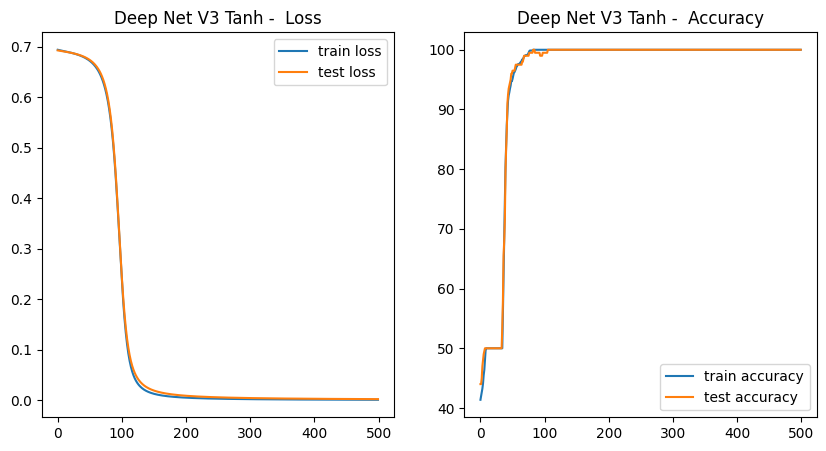

In [18]:
plot_loss_acc(deepv3_history, "Deep Net V3 Tanh - ")

In [19]:
# Evaluate the model
simple_net_loss, simple_net_acc = evaluate(simple_net.to("cpu"), BCE_LOSS, X_test.cpu(), y_test.cpu())
deep_net_loss, deep_net_acc = evaluate(deep_net.to("cpu"), BCE_LOSS, X_test.cpu(), y_test.cpu())
deep_net2_loss, deep_net2_acc = evaluate(deep_model_v2.to("cpu"), BCE_LOSS, X_test.cpu(), y_test.cpu())
deep_net3_loss, deep_net3_acc = evaluate(deep_model_v3.to("cpu"), BCE_LOSS, X_test.cpu(), y_test.cpu())

evaluations = {
    "SimpleNet": [simple_net_loss, simple_net_acc],
    "DeepNet": [deep_net_loss, deep_net_acc],
    "DeepNetV2": [deep_net2_loss, deep_net2_acc],
    "DeepNetV3": [deep_net3_loss, deep_net3_acc]
}

evals_df = pd.DataFrame(evaluations, index=["Loss", "Accuracy"])

In [24]:
evals_df

,SimpleNet,DeepNet,DeepNetV2,DeepNetV3
Loss,0.695709,0.546716,0.007667,0.00219
Accuracy,49.000000,99.500000,100.000000,100.00000


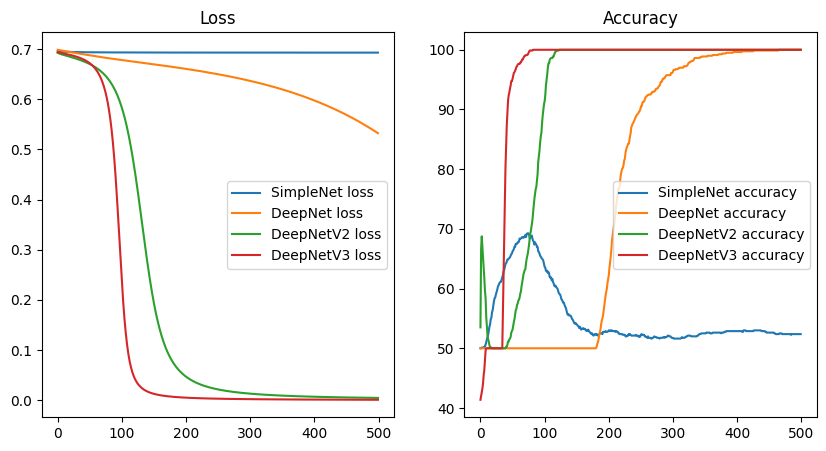

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(simple_history["train_loss"], label="SimpleNet loss")
plt.plot(deep_history["train_loss"], label="DeepNet loss")
plt.plot(deepv2_history["train_loss"], label="DeepNetV2 loss")
plt.plot(deepv3_history["train_loss"], label="DeepNetV3 loss")
plt.legend()
plt.title("Loss")
plt.subplot(1, 2, 2)
plt.plot(simple_history["train_accuracy"], label="SimpleNet accuracy")
plt.plot(deep_history["train_accuracy"], label="DeepNet accuracy")
plt.plot(deepv2_history["train_accuracy"], label="DeepNetV2 accuracy")
plt.plot(deepv3_history["train_accuracy"], label="DeepNetV3 accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [21]:
from utils import plot_decision_boundary

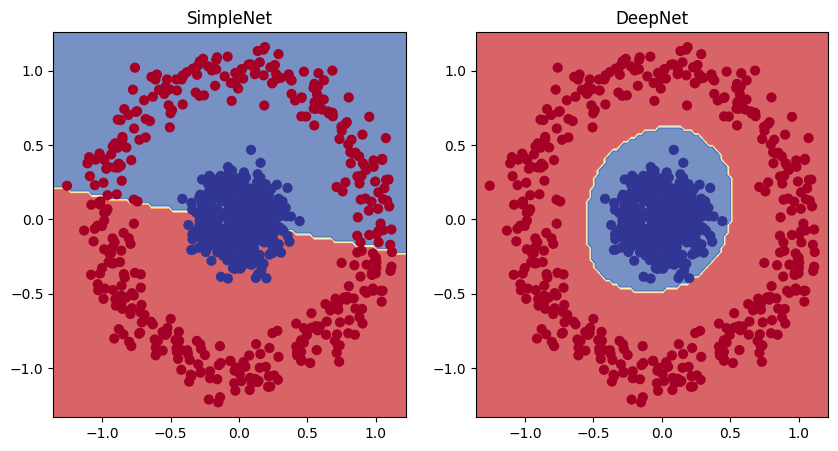

In [22]:
# Predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("SimpleNet")
plot_decision_boundary(simple_net, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("DeepNet")
plot_decision_boundary(deep_net, X_train, y_train)
plt.show()

Text(0.5, 1.0, 'DeepNetV3')

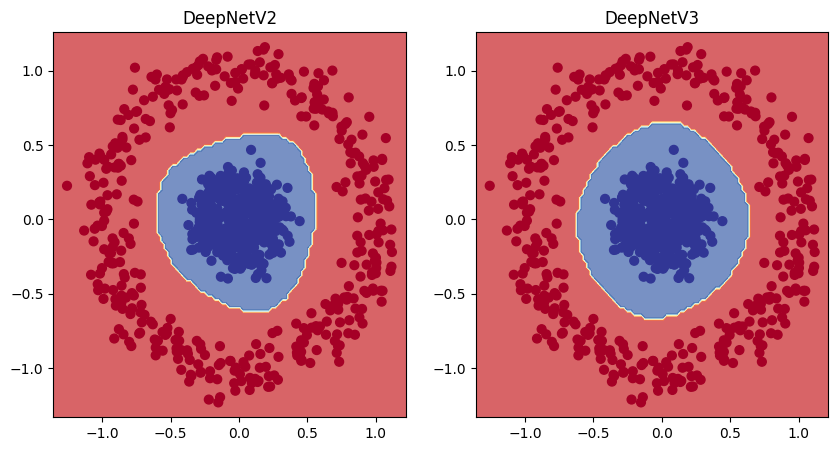

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(deep_model_v2, X_train, y_train)
plt.title("DeepNetV2")
plt.subplot(1, 2, 2)
plot_decision_boundary(deep_model_v3, X_train, y_train)
plt.title("DeepNetV3")